<a href="https://colab.research.google.com/github/prashu2507/AI-Powered-Call-Centre/blob/main/Retail_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [5]:
from google.colab import files
uploaded = files.upload()

Saving Online Retail.xlsx to Online Retail.xlsx


In [7]:
data =pd.read_excel('Online Retail.xlsx')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
data


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [10]:
data['TotalPrice'] = data['Quantity']*data['UnitPrice']

In [11]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [13]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
reference_date = data['InvoiceDate'].max() + pd.Timedelta(days=1) #most recent visit to the oldest/first visit with invoice

# Perform RFM + Tenure + AvgOrderValue aggregation
rfm = data.groupby('CustomerID').agg({
    'InvoiceDate': [
        lambda x: (reference_date - x.max()).days,  # Recency
        lambda x: (x.max() - x.min()).days          # Tenure diff btw first purchase and last purchase
    ],
    'InvoiceNo': 'nunique',                        # Frequency
    'TotalPrice': [
        'sum',                                     # Monetary is the total amount spent in the retail shop
        lambda x: x.sum() / x.nunique()            # Avg Order Value defined as the total number of monetary to that of the total invoices
    ]
})

rfm.columns = ['Recency', 'Tenure', 'Frequency', 'Monetary', 'AvgOrderValue']
rfm = rfm.reset_index()
print(rfm.head())

   CustomerID  Recency  Tenure  Frequency  Monetary  AvgOrderValue
0     12346.0      326       0          2      0.00       0.000000
1     12347.0        2     365          7   4310.00      76.964286
2     12348.0       75     282          4   1797.24     112.327500
3     12349.0       19       0          1   1757.55      41.846429
4     12350.0      310       0          1    334.40      37.155556


In [14]:
rfm

,CustomerID,Recency,Tenure,Frequency,Monetary,AvgOrderValue
0,12346.0,326,0,2,0.00,0.000000
1,12347.0,2,365,7,4310.00,76.964286
2,12348.0,75,282,4,1797.24,112.327500
3,12349.0,19,0,1,1757.55,41.846429
4,12350.0,310,0,1,334.40,37.155556
...,...,...,...,...,...,...
4367,18280.0,278,0,1,180.60,22.575000
4368,18281.0,181,0,1,80.82,20.205000
4369,18282.0,8,118,3,176.60,16.054545
4370,18283.0,4,333,16,2094.88,27.206234


In [16]:
r_labels = range(1,6)
rfm['R_score'] = pd.qcut(rfm['Recency'], q=5, labels=r_labels,duplicates='drop')
f_bins = pd.qcut(rfm['Frequency'], q=5,duplicates = 'drop')
f_labels = range(1,len(f_bins.cat.categories )+ 1)
rfm['F_score'] = pd.qcut(rfm['Frequency'], q=5, labels=f_labels,duplicates='drop')
m_bins = pd.qcut(rfm['Monetary'], q=5, labels=range(1,6),duplicates = 'drop')
m_labels = range(1,len(m_bins.cat.categories )+ 1)
rfm['M_score'] = pd.qcut(rfm['Monetary'], q=5, labels=m_labels,duplicates='drop')
print(rfm.head())

   CustomerID  Recency  Tenure  Frequency  Monetary  AvgOrderValue R_score  \
0     12346.0      326       0          2      0.00       0.000000       5   
1     12347.0        2     365          7   4310.00      76.964286       1   
2     12348.0       75     282          4   1797.24     112.327500       4   
3     12349.0       19       0          1   1757.55      41.846429       2   
4     12350.0      310       0          1    334.40      37.155556       5   

  F_score M_score  
0       1       1  
1       3       5  
2       2       4  
3       1       4  
4       1       2  


In [17]:
#combine R,F,M scores to create an RFM segement
rfm['RFM_Segment'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)

In [18]:
rfm

,CustomerID,Recency,Tenure,Frequency,Monetary,AvgOrderValue,R_score,F_score,M_score,RFM_Segment
0,12346.0,326,0,2,0.00,0.000000,5,1,1,511
1,12347.0,2,365,7,4310.00,76.964286,1,3,5,135
2,12348.0,75,282,4,1797.24,112.327500,4,2,4,424
3,12349.0,19,0,1,1757.55,41.846429,2,1,4,214
4,12350.0,310,0,1,334.40,37.155556,5,1,2,512
...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,278,0,1,180.60,22.575000,5,1,1,511
4368,18281.0,181,0,1,80.82,20.205000,5,1,1,511
4369,18282.0,8,118,3,176.60,16.054545,1,2,1,121
4370,18283.0,4,333,16,2094.88,27.206234,1,4,5,145


In [19]:
rfm_backup = rfm.copy() #create a backup making major changes

In [25]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   CustomerID     4372 non-null   float64 
 1   Recency        4372 non-null   int64   
 2   Tenure         4372 non-null   int64   
 3   Frequency      4372 non-null   int64   
 4   Monetary       4372 non-null   float64 
 5   AvgOrderValue  4372 non-null   float64 
 6   R_score        4372 non-null   category
 7   F_score        4372 non-null   category
 8   M_score        4372 non-null   category
 9   RFM_Segment    4372 non-null   object  
dtypes: category(3), float64(3), int64(3), object(1)
memory usage: 252.4+ KB


In [28]:
def rfm_label(row):
    # Define the conditions to cover all possible combinations
    if row['R_score'] in [1, 2] and row['F_score'] in [4, 5] and row['M_score'] in [4, 5]:
        return 'Best Customers'
    elif row['R_score'] in [1, 2, 3] and row['F_score'] in [4, 5] and row['M_score'] in [3, 4, 5]:
        return 'Loyal Customers'
    elif row['R_score'] in [1, 2, 3] and row['M_score'] in [4, 5]:
        return 'Big Spenders'
    elif row['R_score'] in [4, 5] and row['F_score'] in [3, 4] and row['M_score'] in [3, 4]:
        return 'Almost Lost'
    elif row['R_score'] == 5 and row['F_score'] in [1, 2] and row['M_score'] in [1, 2]:
        return 'Lost Customers'
    elif row['R_score'] in [2, 3] and row['F_score'] in [3, 4] and row['M_score'] in [3, 4]:
        return 'Promising Customers'
    elif row['R_score'] == 4 and row['F_score'] in [3, 4] and row['M_score'] in [3, 4]:
        return 'Need Attention'
    elif row['R_score'] in [1, 2, 3] and row['F_score'] in [1, 2] and row['M_score'] in [1, 2]:
        return 'Low Value'
    elif row['R_score'] in [4, 5] and row['F_score'] in [1, 2] and row['M_score'] in [1, 2]:
        return 'Engaged but Not Buying'
    elif row['R_score'] in [1, 2] and row['F_score'] in [1, 2] and row['M_score'] in [3, 4, 5]:
        return 'High Potential'
    elif row['R_score'] in [4,5] and row['F_score'] in [1, 2] and row['M_score'] in [3,4, 5]:
        return 'Infrequent Big Spenders'
    elif row['R_score'] in [3,4,5] and row['F_score'] in [3,4, 5] and row['M_score'] in [3,4, 5]:
        return 'Potentially lost High value customers'
    elif row['R_score'] in [4, 5] and row['F_score'] in [4, 5] and row['M_score'] in [1, 2]:
        return 'Active but Low Spend'
    elif row['R_score'] in [3] and row['F_score'] in [1, 2] and row['M_score'] in [3]:
        return 'Infrequent Moderate Spenders'
    else:
        return 'Other'

# Apply the function to create labels
rfm['RFM_Label'] = rfm.apply(rfm_label, axis=1)

In [23]:
print(rfm.columns)

Index(['CustomerID', 'Recency', 'Tenure', 'Frequency', 'Monetary',
       'AvgOrderValue', 'R_score', 'F_score', 'M_score', 'RFM_Segment'],
      dtype='object')


In [24]:
print(rfm.head())

   CustomerID  Recency  Tenure  Frequency  Monetary  AvgOrderValue R_score  \
0     12346.0      326       0          2      0.00       0.000000       5   
1     12347.0        2     365          7   4310.00      76.964286       1   
2     12348.0       75     282          4   1797.24     112.327500       4   
3     12349.0       19       0          1   1757.55      41.846429       2   
4     12350.0      310       0          1    334.40      37.155556       5   

  F_score M_score RFM_Segment  
0       1       1         511  
1       3       5         135  
2       2       4         424  
3       1       4         214  
4       1       2         512  


In [29]:
rfm.value_counts('RFM_Label')

,count
RFM_Label,
Big Spenders,741
Low Value,701
Lost Customers,655
Best Customers,581
Infrequent Big Spenders,535
Engaged but Not Buying,364
High Potential,255
Infrequent Moderate Spenders,168
Almost Lost,106


In [32]:
data_cloned = data.copy()

In [33]:
data_cloned

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   TotalPrice   541909 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 37.2+ MB


In [39]:
def churn_label(row):
  if row['Recency']>180:
    return 'Churned'
  if row['Recency']>90:
    return 'At Risk'
  else:
    return 'Active'

In [40]:
rfm_cloned = rfm.copy()

In [41]:
rfm_cloned['Churn_Label'] = rfm_cloned.apply(churn_label, axis=1)

In [43]:
rfm_cloned

,CustomerID,Recency,Tenure,Frequency,Monetary,AvgOrderValue,R_score,F_score,M_score,RFM_Segment,RFM_Label,Churn_Label
0,12346.0,326,0,2,0.00,0.000000,5,1,1,511,Lost Customers,Churned
1,12347.0,2,365,7,4310.00,76.964286,1,3,5,135,Big Spenders,Active
2,12348.0,75,282,4,1797.24,112.327500,4,2,4,424,Infrequent Big Spenders,Active
3,12349.0,19,0,1,1757.55,41.846429,2,1,4,214,Big Spenders,Active
4,12350.0,310,0,1,334.40,37.155556,5,1,2,512,Lost Customers,Churned
...,...,...,...,...,...,...,...,...,...,...,...,...
4367,18280.0,278,0,1,180.60,22.575000,5,1,1,511,Lost Customers,Churned
4368,18281.0,181,0,1,80.82,20.205000,5,1,1,511,Lost Customers,Churned
4369,18282.0,8,118,3,176.60,16.054545,1,2,1,121,Low Value,Active
4370,18283.0,4,333,16,2094.88,27.206234,1,4,5,145,Best Customers,Active


In [46]:
churn_counts = rfm_cloned['Churn_Label'].value_counts()
print(churn_counts)

Churn_Label
Active     2918
Churned     864
At Risk     590
Name: count, dtype: int64


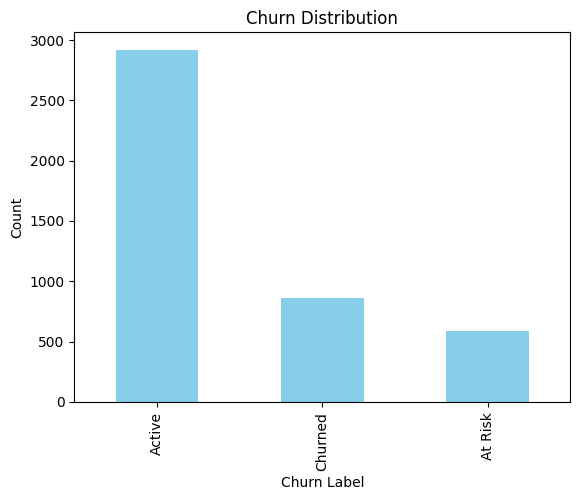

In [47]:
import matplotlib.pyplot as plt
#plot the churn distribution
churn_counts.plot(kind='bar', color='skyblue')
plt.title('Churn Distribution')
plt.xlabel('Churn Label')
plt.ylabel('Count')
plt.show()